In [1]:
import os
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

# Create figure

In [2]:
## A4 Landscape figure
FIG = plt.figure(figsize=(11.69,8.27))

<Figure size 841.68x595.44 with 0 Axes>

In [3]:
## Populate with 4 plots
PL1 = FIG.add_subplot(2, 2, 1)
PL2 = FIG.add_subplot(2, 2, 2)
PL3 = FIG.add_subplot(2, 2, 3)
PL4 = FIG.add_subplot(2, 2, 4)

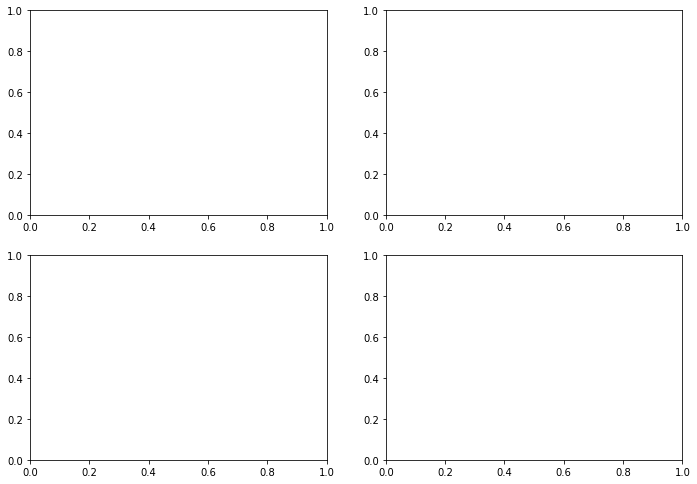

In [4]:
FIG

# Load datasets

In [5]:
## Videogames dataset
dfv1 = pd.read_csv('ratings_Video_Games.csv', names=['User_ID', 'Product_ID', 'Rating', 'Timestamp'])
dfv1['Review_Date'] = pd.to_datetime(dfv1['Timestamp'], unit = 's', origin = 'unix', errors = 'coerce')
del dfv1['Timestamp']
dfv1.head(5)

,User_ID,Product_ID,Rating,Review_Date
0,AB9S9279OZ3QO,0078764343,5.0,2013-07-07
1,A24SSUT5CSW8BH,0078764343,5.0,2013-08-24
2,AK3V0HEBJMQ7J,0078764343,4.0,2013-07-04
3,A10BECPH7W8HM7,043933702X,5.0,2014-07-10
4,A2PRV9OULX1TWP,043933702X,5.0,2013-12-04


In [6]:
## Pet dataset
dfp1 = pd.read_csv('ratings_Pet_Supplies.csv', names=['User_ID', 'Product_ID', 'Rating', 'Timestamp'])
dfp1['Review_Date'] = pd.to_datetime(dfp1['Timestamp'], unit = 's', origin = 'unix', errors = 'coerce')
del dfp1['Timestamp']
dfp1.head(5)

,User_ID,Product_ID,Rating,Review_Date
0,A3PG0KS1YE8MR4,0615553605,5.0,2012-12-07
1,A363P047LR5XI6,0615553605,4.0,2013-07-16
2,ABZ8CQXD42H4,0615553605,1.0,2013-12-03
3,A3J8QW1MV1OP01,0615583474,5.0,2012-09-11
4,A3ISA8Z0NB0ILH,0615583474,5.0,2013-01-23


In [7]:
## Auto dataset
dfa1 = pd.read_csv('ratings_Automotive.csv', names=['User_ID', 'Product_ID', 'Rating', 'Timestamp'])
dfa1['Review_Date'] = pd.to_datetime(dfa1['Timestamp'], unit = 's', origin = 'unix', errors = 'coerce')
del dfa1['Timestamp']
dfa1.head(5)

,User_ID,Product_ID,Rating,Review_Date
0,A108J5O7DG2WIM,0219400083,4.0,2013-08-17
1,A1QBLUSZW281TA,0715000322,5.0,2014-04-08
2,A3B40ZIZJ3HEP7,0970408641,1.0,2012-03-19
3,A1DUAXYX5WHSX1,1940825172,4.0,2014-07-07
4,A1VS7YWE0NCAS3,2409862403,4.0,2013-10-10


In [8]:
# Merge to get the full dataset
frames = [dfv1, dfp1, dfa1]
df = pd.concat(frames, keys=['Videogames', 'Pet Supplies', 'Automotive'])
df

User_ID  Product_ID  Rating Review_Date
Videogames 0         AB9S9279OZ3QO  0078764343     5.0  2013-07-07
           1        A24SSUT5CSW8BH  0078764343     5.0  2013-08-24
           2         AK3V0HEBJMQ7J  0078764343     4.0  2013-07-04
           3        A10BECPH7W8HM7  043933702X     5.0  2014-07-10
           4        A2PRV9OULX1TWP  043933702X     5.0  2013-12-04
...                            ...         ...     ...         ...
Automotive 1373763  A1TCZF6H0ZULVU  B00LHFPQT2     5.0  2014-07-12
           1373764  A1QFCZCVEA4Y2Q  B00LI1LJTQ     5.0  2014-07-03
           1373765  A1MUILE70L0N2J  B00LJ2X3R0     5.0  2014-07-11
           1373766   ATHXXHPG0APQN  B00LM7NOGW     1.0  2014-07-08
           1373767  A38HD4B3ZJ63IW  B00LOPWU76     5.0  2014-07-22

[3933837 rows x 4 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3933837 entries, (Videogames, 0) to (Automotive, 1373767)
Data columns (total 4 columns):
User_ID        object
Product_ID     object
Rating         float64
Review_Date    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 149.3+ MB


# Clean up data

## Filtering out products launched less than 6 months ago

In [10]:
## Find the general last review date (cutting point)
last = df['Review_Date'].max()
df['Cutting Point'] = last
last

Timestamp('2014-07-23 00:00:00')

In [11]:
## Find the first and last review date for each product
## Calculate delta_date for each product = Cutting Point - First Review
df.loc[:,'First_Review'] = df.groupby('Product_ID')['Review_Date'].transform(np.min)
df.loc[:,'delta_days'] = (df['Cutting Point']-df['First_Review']).dt.days

In [12]:
df.head()

User_ID  Product_ID  Rating Review_Date Cutting Point  \
Videogames 0   AB9S9279OZ3QO  0078764343     5.0  2013-07-07    2014-07-23   
           1  A24SSUT5CSW8BH  0078764343     5.0  2013-08-24    2014-07-23   
           2   AK3V0HEBJMQ7J  0078764343     4.0  2013-07-04    2014-07-23   
           3  A10BECPH7W8HM7  043933702X     5.0  2014-07-10    2014-07-23   
           4  A2PRV9OULX1TWP  043933702X     5.0  2013-12-04    2014-07-23   

             First_Review  delta_days  
Videogames 0   2013-07-04         384  
           1   2013-07-04         384  
           2   2013-07-04         384  
           3   2013-04-17         462  
           4   2013-04-17         462

In [13]:
## Filter out new products (<183 days since first review)
df2 = df[df['delta_days'] > 183]
df2.head()

User_ID  Product_ID  Rating Review_Date Cutting Point  \
Videogames 0   AB9S9279OZ3QO  0078764343     5.0  2013-07-07    2014-07-23   
           1  A24SSUT5CSW8BH  0078764343     5.0  2013-08-24    2014-07-23   
           2   AK3V0HEBJMQ7J  0078764343     4.0  2013-07-04    2014-07-23   
           3  A10BECPH7W8HM7  043933702X     5.0  2014-07-10    2014-07-23   
           4  A2PRV9OULX1TWP  043933702X     5.0  2013-12-04    2014-07-23   

             First_Review  delta_days  
Videogames 0   2013-07-04         384  
           1   2013-07-04         384  
           2   2013-07-04         384  
           3   2013-04-17         462  
           4   2013-04-17         462

In [14]:
## test whether this worked 
df2.loc[df2['delta_days'] < 183]

,,User_ID,Product_ID,Rating,Review_Date,Cutting Point,First_Review,delta_days


In [15]:
## clean up the dataframe
df3 = df2.drop(['delta_days', 'Cutting Point'], axis=1)
df3.head()

User_ID  Product_ID  Rating Review_Date First_Review
Videogames 0   AB9S9279OZ3QO  0078764343     5.0  2013-07-07   2013-07-04
           1  A24SSUT5CSW8BH  0078764343     5.0  2013-08-24   2013-07-04
           2   AK3V0HEBJMQ7J  0078764343     4.0  2013-07-04   2013-07-04
           3  A10BECPH7W8HM7  043933702X     5.0  2014-07-10   2013-04-17
           4  A2PRV9OULX1TWP  043933702X     5.0  2013-12-04   2013-04-17

# Plot 1 : Trajectory over time

## Create the trajectory

In [16]:
df3.loc[:,'Last_Review'] = df3.groupby('Product_ID')['Review_Date'].transform(np.max)
df3.loc[:,'delta_days'] = (df3['Last_Review']-df3['First_Review']).dt.days
df3.head()

User_ID  Product_ID  Rating Review_Date First_Review  \
Videogames 0   AB9S9279OZ3QO  0078764343     5.0  2013-07-07   2013-07-04   
           1  A24SSUT5CSW8BH  0078764343     5.0  2013-08-24   2013-07-04   
           2   AK3V0HEBJMQ7J  0078764343     4.0  2013-07-04   2013-07-04   
           3  A10BECPH7W8HM7  043933702X     5.0  2014-07-10   2013-04-17   
           4  A2PRV9OULX1TWP  043933702X     5.0  2013-12-04   2013-04-17   

             Last_Review  delta_days  
Videogames 0  2013-08-24          51  
           1  2013-08-24          51  
           2  2013-08-24          51  
           3  2014-07-10         449  
           4  2014-07-10         449

In [17]:
## test whether this worked 
df3.loc[df3['delta_days'] < 0]

,,User_ID,Product_ID,Rating,Review_Date,First_Review,Last_Review,delta_days


In [18]:
# adding review count data
df3.loc[:, 'count'] = 1
co1 = df3.groupby('User_ID')['count']
df3.loc[:, 'cumsum'] = co1.transform(np.cumsum)
df3.head()

User_ID  Product_ID  Rating Review_Date First_Review  \
Videogames 0   AB9S9279OZ3QO  0078764343     5.0  2013-07-07   2013-07-04   
           1  A24SSUT5CSW8BH  0078764343     5.0  2013-08-24   2013-07-04   
           2   AK3V0HEBJMQ7J  0078764343     4.0  2013-07-04   2013-07-04   
           3  A10BECPH7W8HM7  043933702X     5.0  2014-07-10   2013-04-17   
           4  A2PRV9OULX1TWP  043933702X     5.0  2013-12-04   2013-04-17   

             Last_Review  delta_days  count  cumsum  
Videogames 0  2013-08-24          51      1       1  
           1  2013-08-24          51      1       1  
           2  2013-08-24          51      1       1  
           3  2014-07-10         449      1       1  
           4  2014-07-10         449      1       1

In [19]:
co2 = df3.groupby('User_ID')
df4 = pd.DataFrame(co2['cumsum'].max())
df5 = df3.merge(df4, on='User_ID', how='left')
df5.rename(columns={'cumsum_y':'#Reviews'}, inplace=True)
df5.head()

,User_ID,Product_ID,Rating,Review_Date,First_Review,Last_Review,delta_days,count,cumsum_x,#Reviews
0,AB9S9279OZ3QO,0078764343,5.0,2013-07-07,2013-07-04,2013-08-24,51,1,1,1
1,A24SSUT5CSW8BH,0078764343,5.0,2013-08-24,2013-07-04,2013-08-24,51,1,1,22
2,AK3V0HEBJMQ7J,0078764343,4.0,2013-07-04,2013-07-04,2013-08-24,51,1,1,14
3,A10BECPH7W8HM7,043933702X,5.0,2014-07-10,2013-04-17,2014-07-10,449,1,1,3
4,A2PRV9OULX1TWP,043933702X,5.0,2013-12-04,2013-04-17,2014-07-10,449,1,1,1


In [ ]:
## Why did the categories dissapear??

In [20]:
co3 = df5.groupby('Product_ID')
df6 = pd.DataFrame(co3['#Reviews'].max())
df7 = pd.DataFrame(co3['First_Review'].min())

# merge those two DF into one
df7 = df6.merge(df5, on='Product_ID', how='left').sort_values(['First_Review'], ascending=True)
df7.head()

,Product_ID,#Reviews_x,User_ID,Rating,Review_Date,First_Review,Last_Review,delta_days,count,cumsum_x,#Reviews_y
8172,B00000JL6V,84,A1DW7EAA1SV4C5,5.0,2002-04-17,1997-11-08,2014-06-08,6056,1,1,1
8159,B00000JL6V,84,A2NJW6QOWJLWFL,5.0,1999-12-23,1997-11-08,2014-06-08,6056,1,1,1
8160,B00000JL6V,84,A525BHQOLOAER,4.0,2009-02-15,1997-11-08,2014-06-08,6056,1,1,1
8161,B00000JL6V,84,A37J3J0XJ6BHLO,1.0,2010-10-13,1997-11-08,2014-06-08,6056,1,1,1
8162,B00000JL6V,84,A1CBS66P19G09W,4.0,1999-11-28,1997-11-08,2014-06-08,6056,1,1,4


In [422]:
## Max #Reviews:
df7['#Reviews_x'].max()

896

In [22]:
## How many products have x reviews
df7['count'] = 1
df8 = pd.DataFrame(df7.groupby('#Reviews_x').count()['count'])
df8

,count
#Reviews_x,
1,86503
2,96002
3,87062
4,79882
5,73822
...,...
464,18457
517,53901
796,41073


In [ ]:
## Not sure about this one

# Plot 2: Categories

# Plot 3: Evolution

# Plot 4